# Multiple Linear Regression
## Car Price Prediction

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 


They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Essentially, the company wants —


- To identify the variables affecting car prices.

- To create a linear model that quantitatively relates car prices with variables

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

### Data
CarPrice_Assignment.csv : Contains all the relevent specification about the cars in the US market and their pricing .

### Assumptions
1. Linear relationship between independant(X) and target variable(Y)
2. Error terms are normally distributed (not X, Y)
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

importing package for Linear Regression

In [3]:
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
# Check the head of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.describe(percentiles=[0.25,0.33,0.5,0.66,0.75])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
33%,68.320000,0.000000,95.700000,168.932000,64.400000,52.600000,2275.000000,108.000000,3.190000,3.150000,8.864000,82.000000,4832.000000,22.000000,27.320000,8387.120000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
66%,135.640000,1.000000,99.100000,176.800000,66.500000,54.900000,2748.080000,131.000000,3.460000,3.400000,9.367600,111.000000,5400.000000,27.000000,33.000000,13773.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

No missing value present in given dataset
let's check for duplicate rows

In [9]:
#dropping duplicate rows
df=df.drop_duplicates()

In [10]:
#we can drop the car_ID variable which is not relevent for the price modeling
df.drop('car_ID',axis=1,inplace=True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Custom Function Definations For Plotting

In [12]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        
    plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

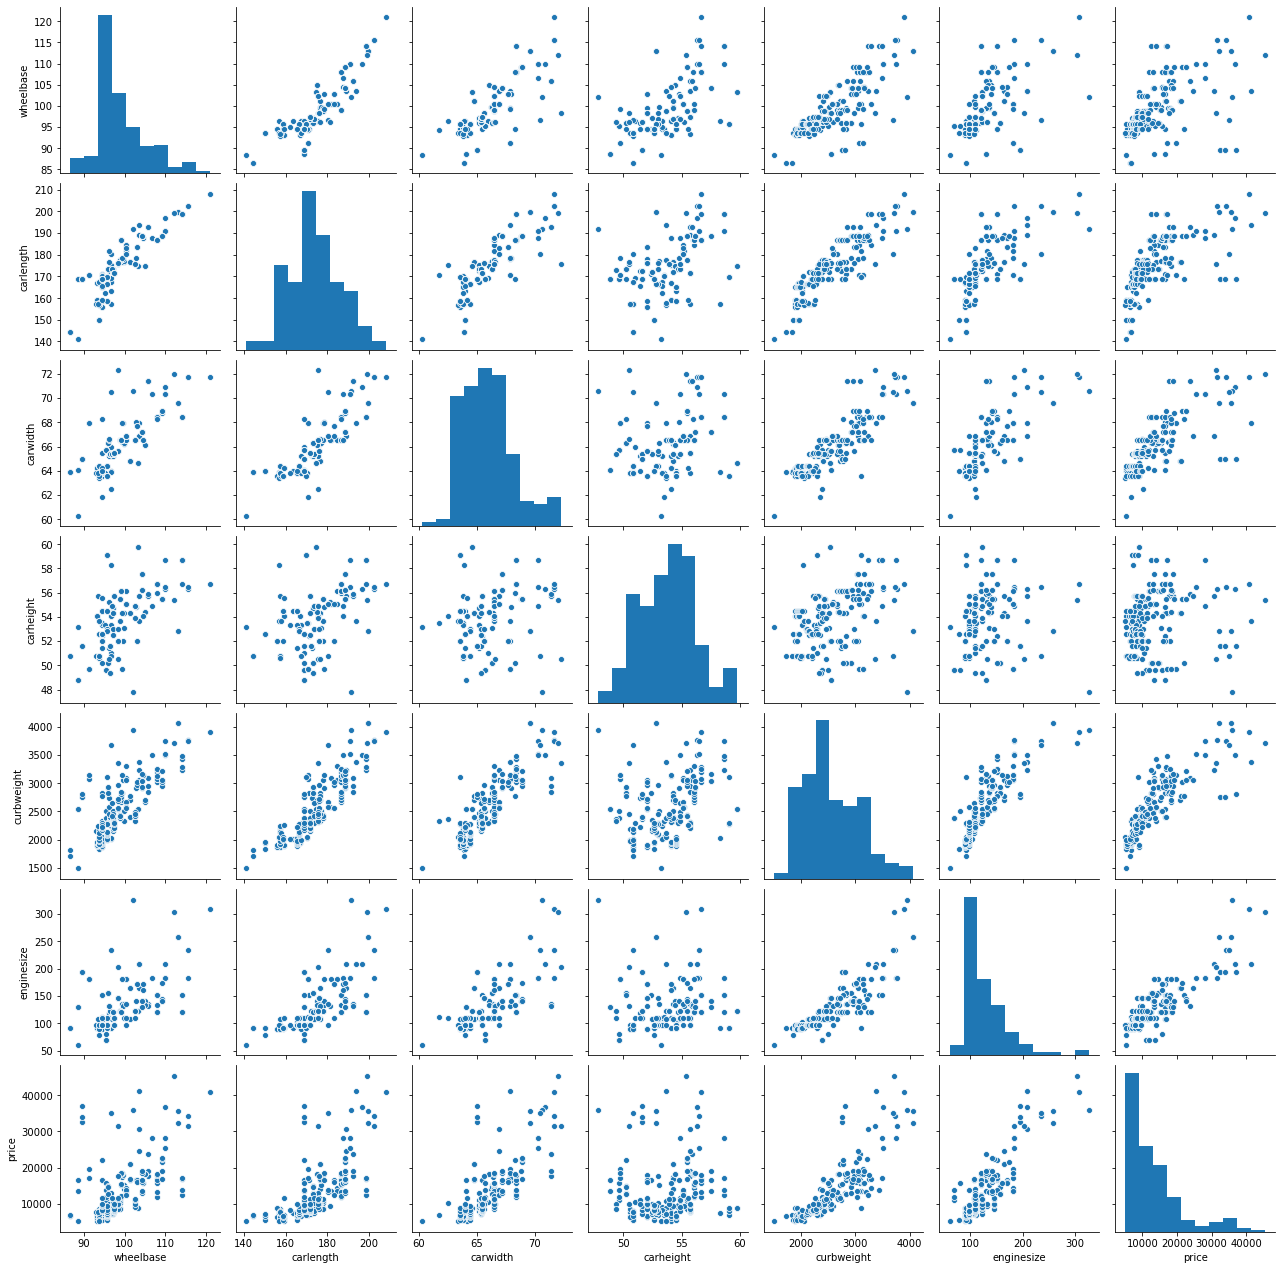

In [13]:
numerical_var_list=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','price']
sns.pairplot(df[numerical_var_list])
plt.show()

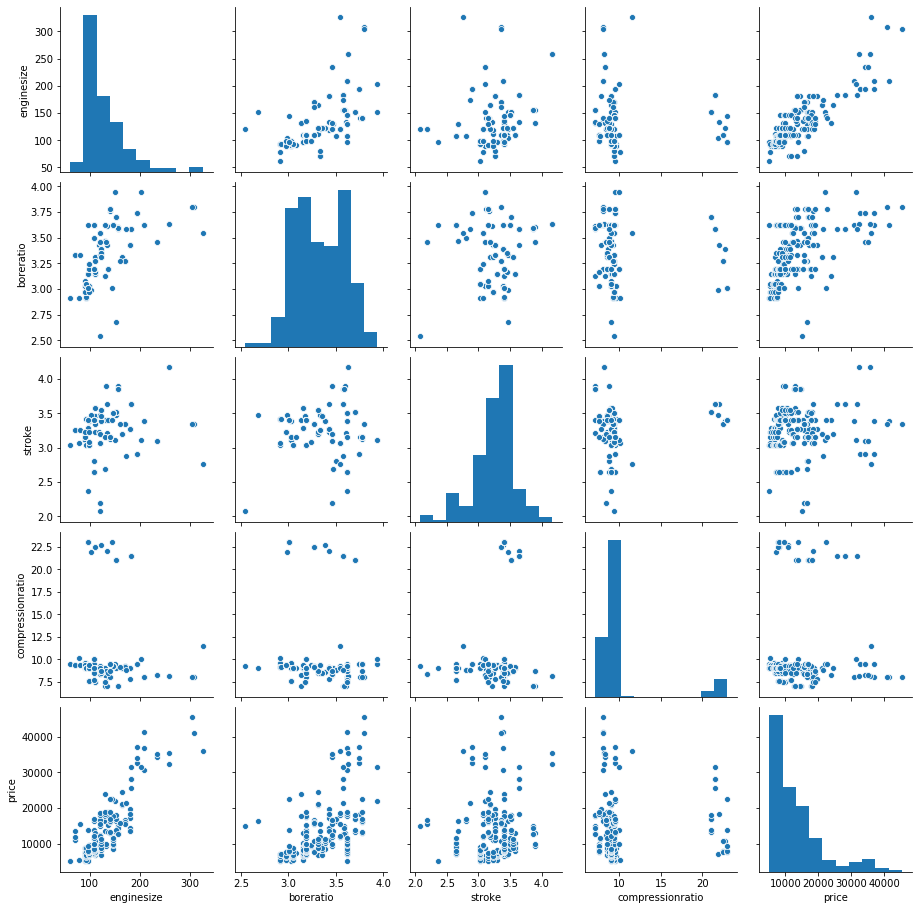

In [14]:
numerical_var_list=['enginesize','boreratio','stroke','compressionratio','price']
sns.pairplot(df[numerical_var_list])
plt.show()

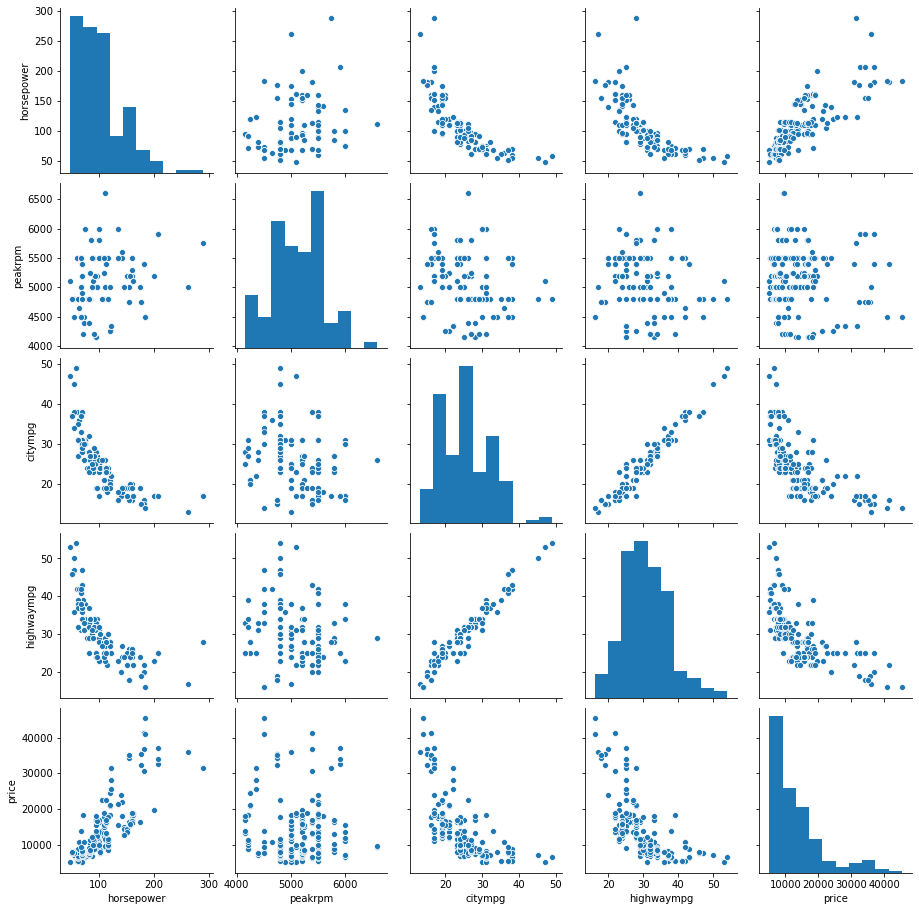

In [15]:
numerical_var_list=['horsepower','peakrpm','citympg','highwaympg','price']
sns.pairplot(df[numerical_var_list])
plt.show()

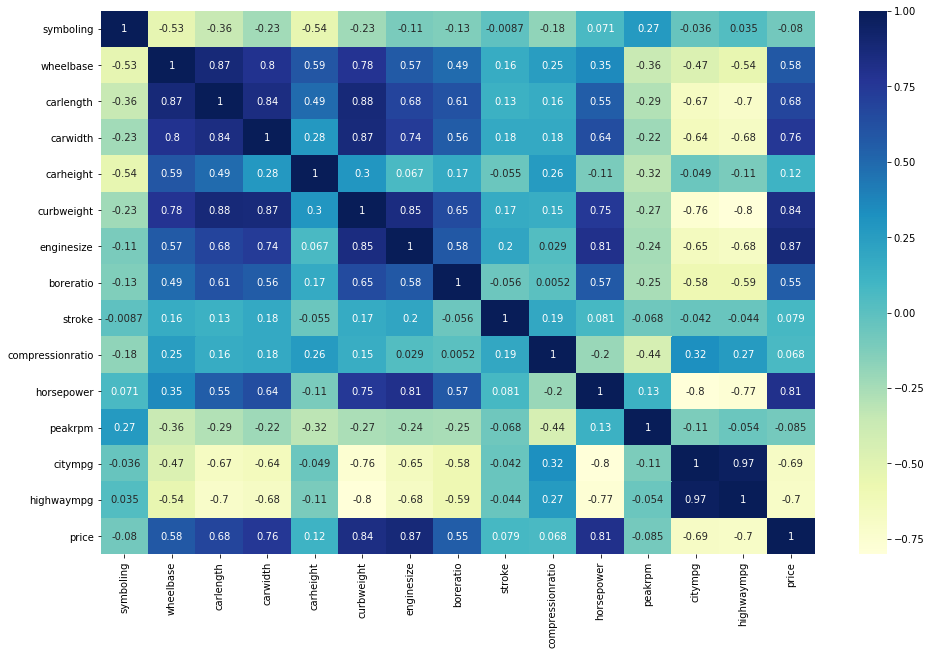

In [16]:
plt.figure(figsize=(16,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.show()

From this, we can have a general sense of which features are related to price. We can spot some features which has some kind of positive relationships going on with the dependent price variable like,
-  wheelbase,
-  carlength,
-  carwidth,
-  curbweight,
-  enginesize,
-  boreratio,
-  horsepower.<br>
However, there are also a few variables showing a negative relationship with price variable like,
-  citympg,
-  highwaympg.
<br>
<br>We will further explore these. For now we know there is some relationship going on with the price variable.


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

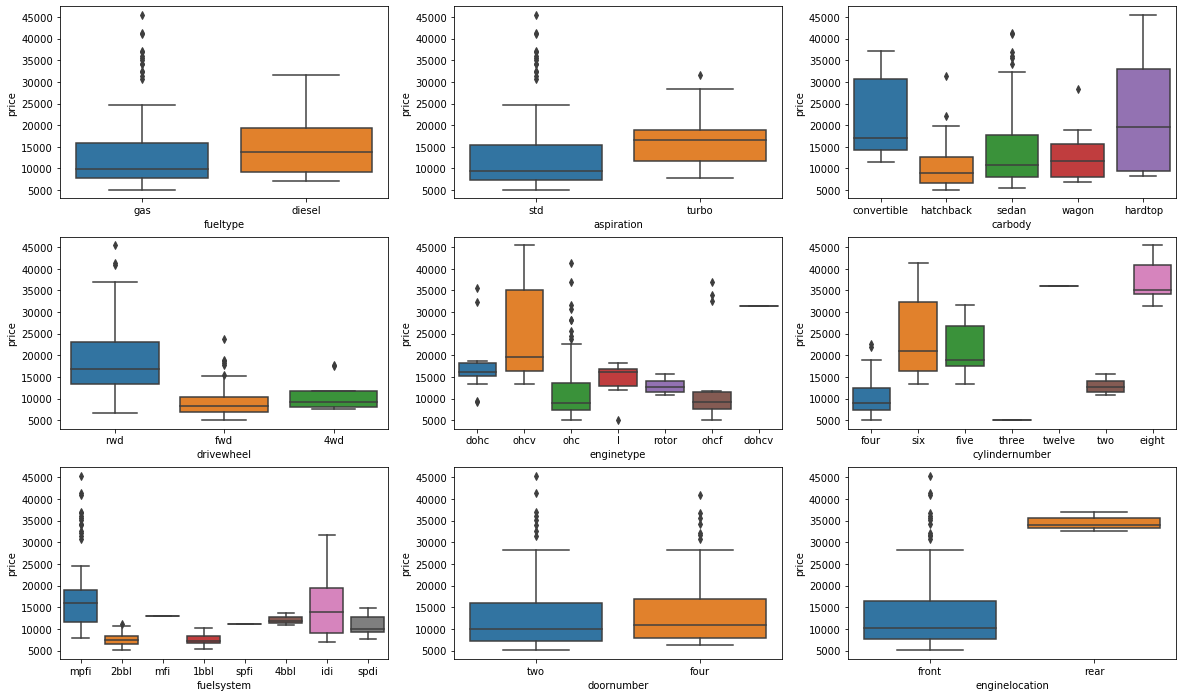

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.show()


**Observations:**   <br>
-  Although not significant but still the fuel type seems have an effect on the pricing of the cars. Let's confirm this later.
-  enginelocation and aspiration surly has a visible affect on the pricing of the car
- The price of real wheel drive is significantly higher that other drivewheel options.
- cylindernumber and engine type also seem to regulate the price of cars.
- hardtop and convertables cars are definatly priced higher than other body types available. Tells us that variable carbody is contributing in determinig the price.

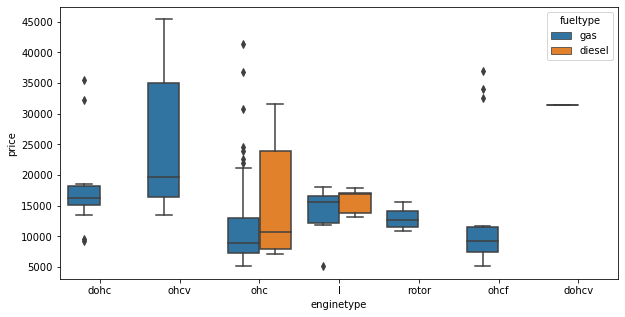

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = df)
plt.show()

## Step 3: Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model buildin

In [21]:
df['CarCompany']=df.CarName.apply(lambda x: x.split()[0])

# Drop 'CarName' as we have created the CarCompany for it

df.drop(['CarName'], axis = 1, inplace = True)

df.sample(n=8)

AttributeError: 'DataFrame' object has no attribute 'CarName'

In [24]:
df.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here, we observe that there are multiple company name being **misspelled**. lets correct this in the data.

In [25]:
# Correcting the misspelled company names.
df['CarCompany'].replace('maxda','mazda',inplace=True)
df['CarCompany'].replace('Nissan','nissan',inplace=True)
df['CarCompany'].replace('porcshce','porsche',inplace=True)
df['CarCompany'].replace('toyouta','toyota',inplace=True)
df['CarCompany'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

Symboling is a categorical variable which has been treeted as a numeric int64 type variable. Let's convert the symboling variable.
<br> Here Symboling is the assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.<br>
Let's make the category clear by classifying based on risk
-  -ve symboling as __safe__
-  0, 1 as **moderate**
-  2,3 as **risky**

In [26]:
df['symboling'] = df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [27]:
categorical_variables = list(df.columns[df.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany']

In [28]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 20))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)


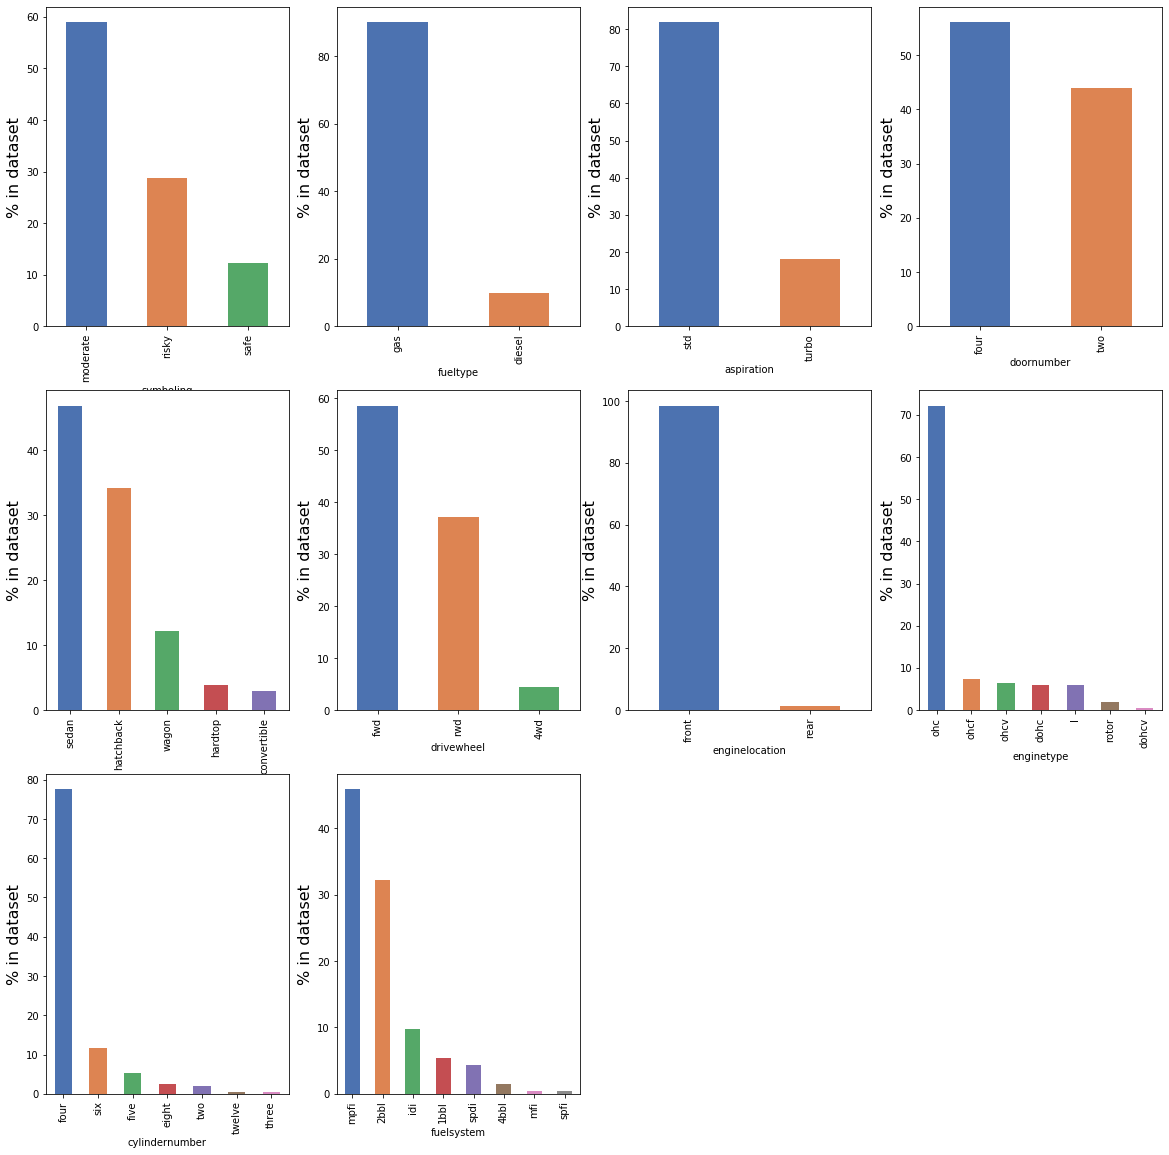

In [29]:
# market percentage of car's with respect to features
plot_percentages(df,categorical_variables[:-1])

We can identify the some of the car **features that are predominant** in the Automobile Market,Company can consider these facts to full fill the market dominant needs and make the needed changes to their manufacturing line.
These features are:
-  **symboling:** moderate [0,1]
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standardm
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi


Lets see the most popular Automobile company in the US Automobile Market

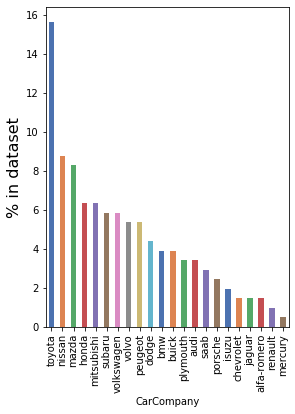

In [30]:
plot_percentages(df,[categorical_variables[-1]])

-  Toyota clearly has a dominant market percentage in the US of 15.6%.
<br> This is followed by:
-  Nissan with 8.8%
-  Mazda with 8.2%
-  Mitsubishi and Honda are equally popular with 6.3% market percentage.

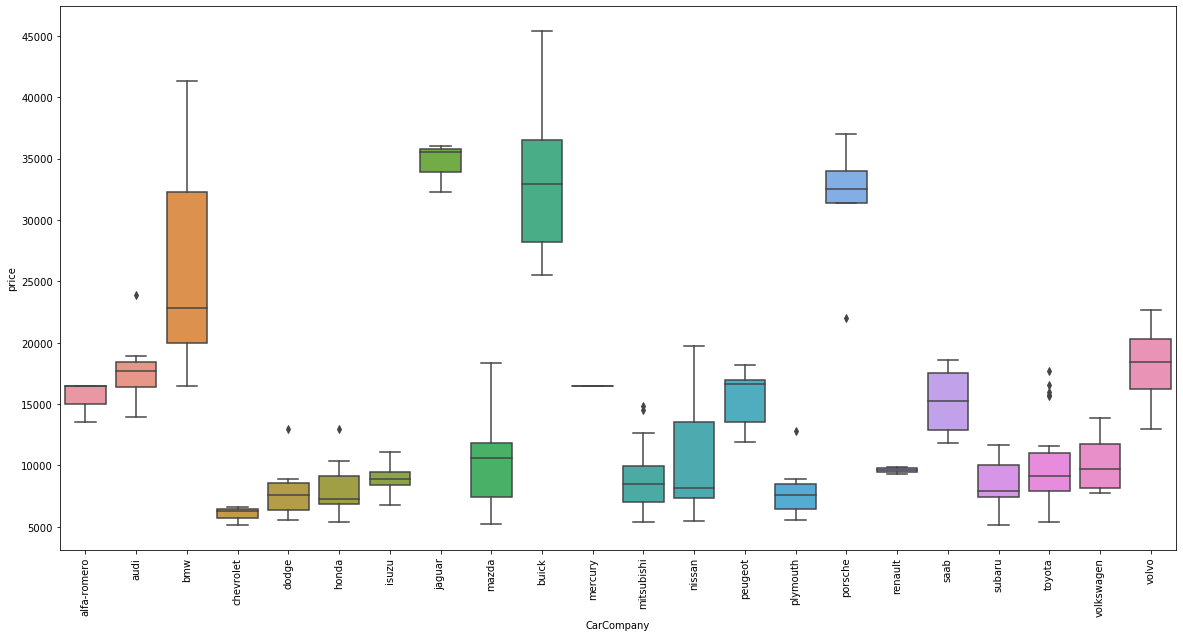

Average US car price:  13276.710570731706
CarCompany
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'price', data = df)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',df['price'].mean())
print(df.groupby('CarCompany').price.mean().sort_values(ascending=False).head())

**Observation:**
-  Each company has a range in which the cars are priced. There are few outilers for these companies showing that they do manufacture some expensive cars which are priced above their usual market pricing range.
-  Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approx. $13,000.
-  company name shows some affect on the price determination.

We can also see how multiple categorical variables together affect the pricing of cars.

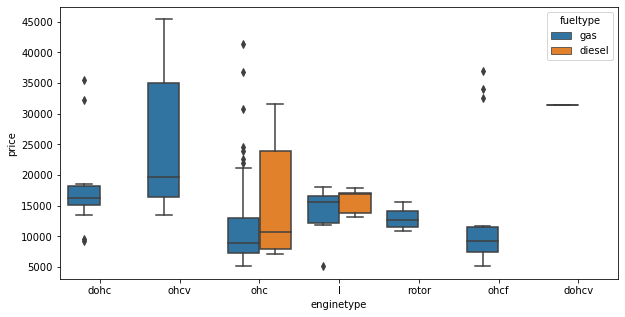

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=df)
plt.show()

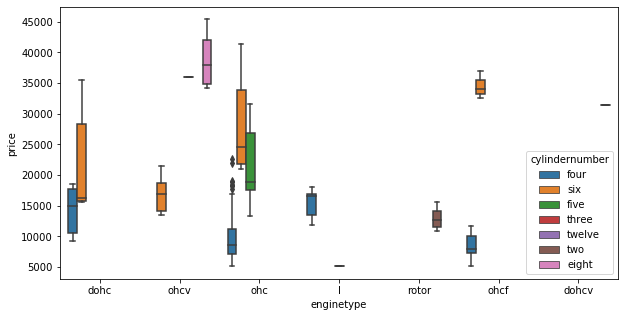

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=df)
plt.show()

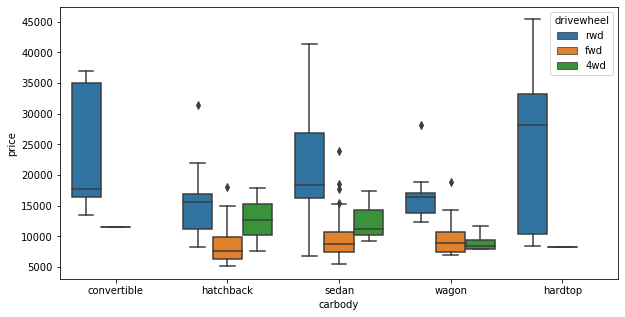

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=df)
plt.show()

### Outlier treatment

Linear Regression, which is highly sensitive to outliers it is important that we treat the outliers before modeling.

<Figure size 432x288 with 0 Axes>

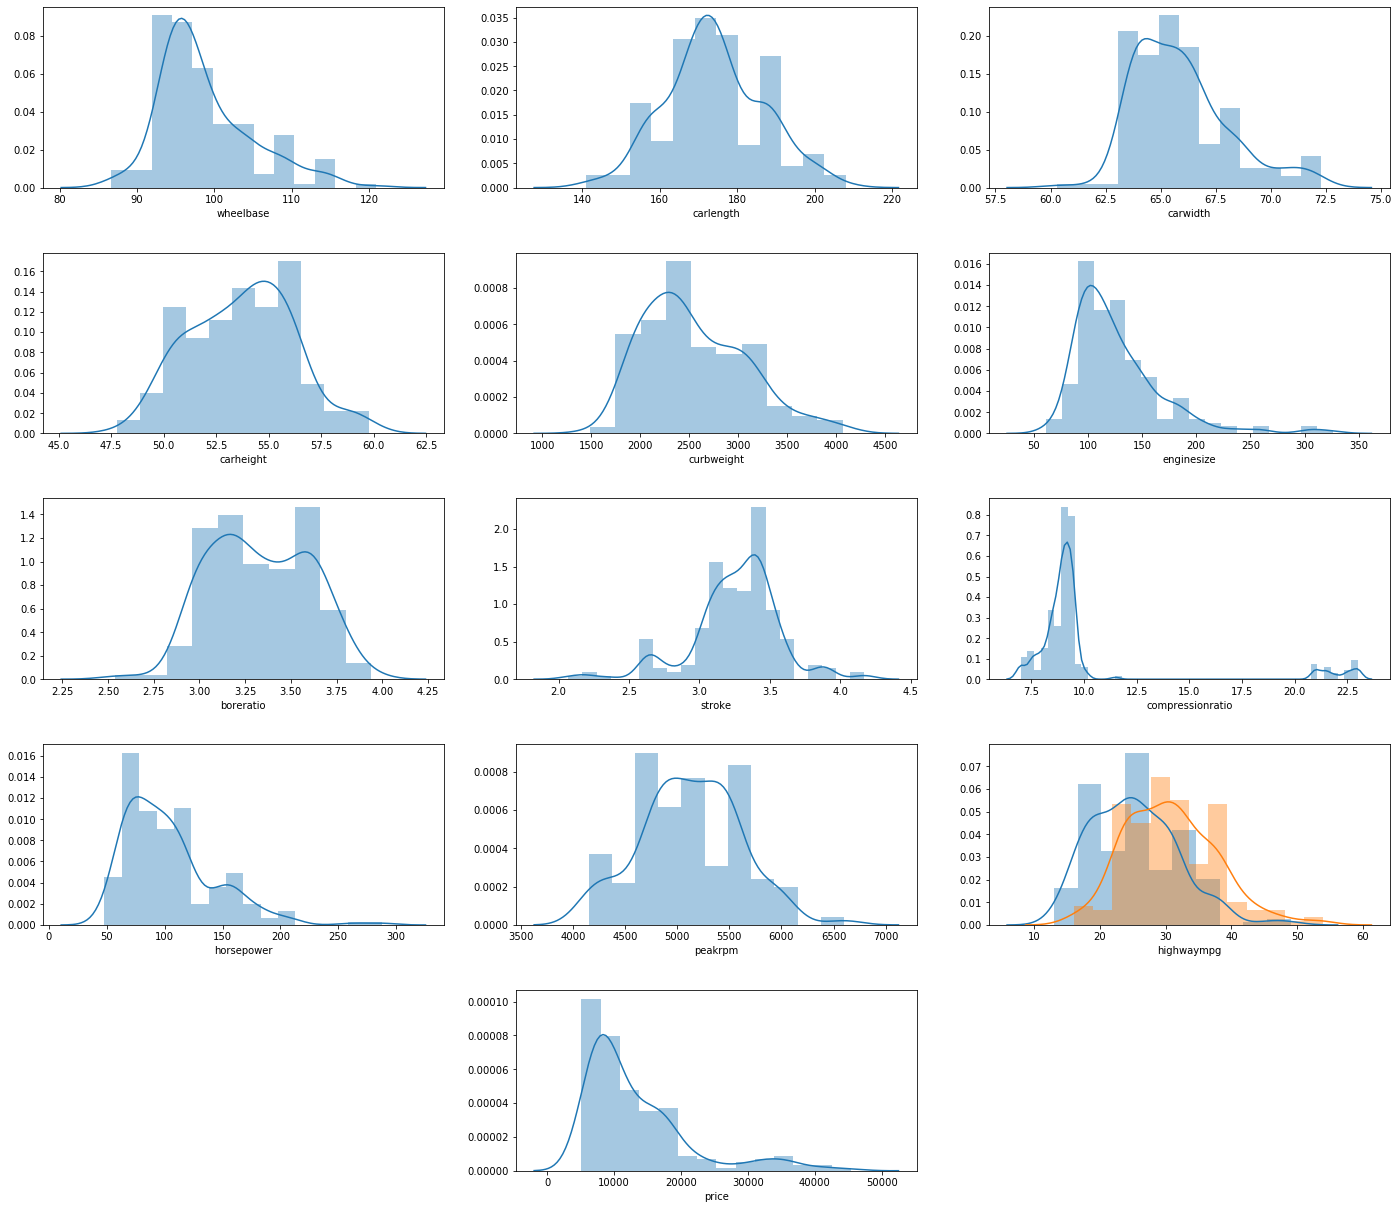

In [35]:
plt.tight_layout(pad=10.0)
plt.figure(figsize=(20, 17))
plt.subplot(5,3,1)
sns.distplot(df.wheelbase,label="wheelbase")
plt.subplot(5,3,2)
sns.distplot(df.carlength)
plt.subplot(5,3,3)
sns.distplot(df.carwidth)
plt.subplot(5,3,4)
sns.distplot(df.carheight)
plt.subplot(5,3,5)
sns.distplot(df.curbweight)
plt.subplot(5,3,6)
sns.distplot(df.enginesize)
plt.subplot(5,3,7)
sns.distplot(df.boreratio)
plt.subplot(5,3,8)
plt.tight_layout(pad=3.0)
sns.distplot(df.stroke)
plt.subplot(5,3,9)
sns.distplot(df.compressionratio)
plt.subplot(5,3,10)
sns.distplot(df.horsepower)
plt.subplot(5,3,11)
sns.distplot(df.peakrpm)
plt.subplot(5,3,12)
sns.distplot(df.citympg)
plt.subplot(5,3,12)
sns.distplot(df.highwaympg)
plt.subplot(5,3,14)
sns.distplot(df.price)
plt.show()


We see enginesize, horsepower and compression ratio variables to have a right skewed distribution, this is probably due to outliers in the variable.

In [36]:
print(df[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(df[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


We decide to treat the outliers by clipping the variables curbweight','horsepower','enginesize' at 96 precentile value. And clip compressionratio at 90 percentile value

In [37]:
# Outilers in price of cars
df['horsepower'][np.abs(df['horsepower'] > 182.00)]= 182.00
df['curbweight'][np.abs(df['curbweight'] > 3657.80)]= 3657.80
df['enginesize'][np.abs(df['enginesize'] > 209.00)]= 209.00
df['compressionratio'][np.abs(df['compressionratio'] > 10.94)]= 10.94

Lets keep car data for which the price is less than 3 standard deviation.

In [38]:
df= df[np.abs(df.price-df.price.mean()) <= (3*df.price.std())]

<Figure size 432x288 with 0 Axes>

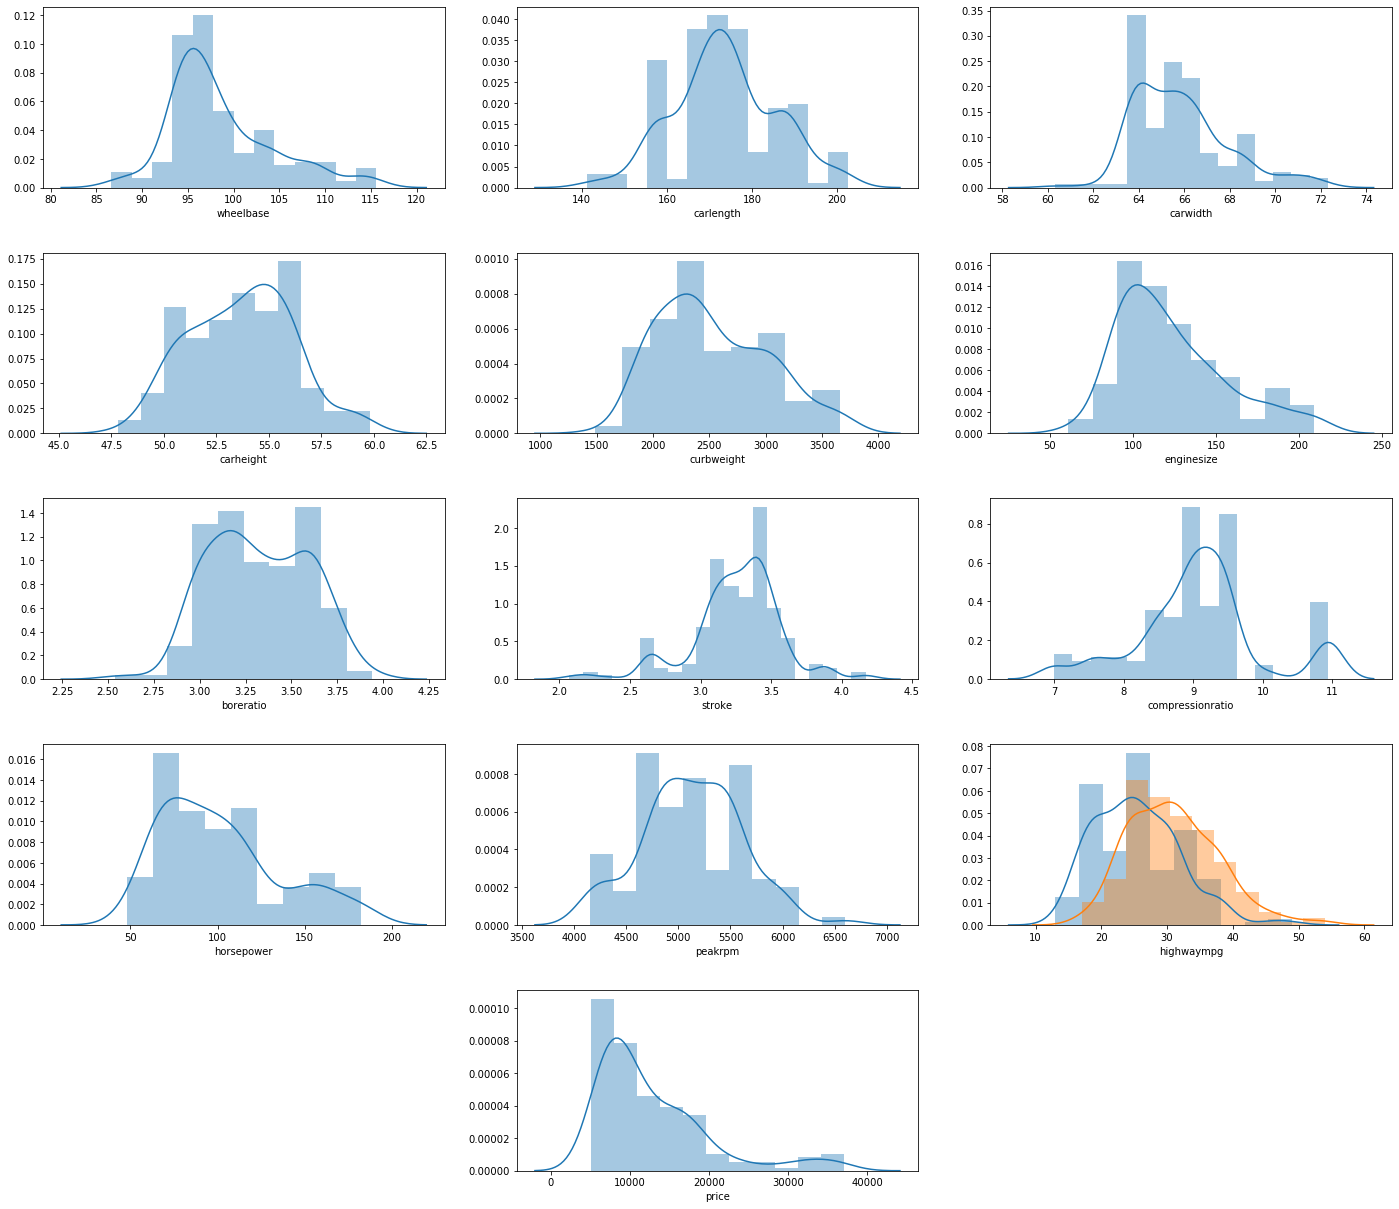

In [39]:
plt.tight_layout(pad=10.0)
plt.figure(figsize=(20, 17))
plt.subplot(5,3,1)
sns.distplot(df.wheelbase,label="wheelbase")
plt.subplot(5,3,2)
sns.distplot(df.carlength)
plt.subplot(5,3,3)
sns.distplot(df.carwidth)
plt.subplot(5,3,4)
sns.distplot(df.carheight)
plt.subplot(5,3,5)
sns.distplot(df.curbweight)
plt.subplot(5,3,6)
sns.distplot(df.enginesize)
plt.subplot(5,3,7)
sns.distplot(df.boreratio)
plt.subplot(5,3,8)
plt.tight_layout(pad=3.0)
sns.distplot(df.stroke)
plt.subplot(5,3,9)
sns.distplot(df.compressionratio)
plt.subplot(5,3,10)
sns.distplot(df.horsepower)
plt.subplot(5,3,11)
sns.distplot(df.peakrpm)
plt.subplot(5,3,12)
sns.distplot(df.citympg)
plt.subplot(5,3,12)
sns.distplot(df.highwaympg)
plt.subplot(5,3,14)
sns.distplot(df.price)
plt.show()

#### Creating new variables
This will be helpful to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [46]:
# Creating new variable PWratio
df['PWratio'] = df.horsepower/df.curbweight

# Creating new variable CarVolume
df['CarVolume']=df.carlength*df.carwidth*df.carheight

df.head(n=8)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,PWratio,CarVolume
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0.043564,528019.904
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0.043564,528019.904
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0.054552,587592.640
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0.043646,634816.956
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0.040722,636734.832
5,risky,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0,audi,0.043877,624189.969
6,moderate,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0,audi,0.038678,766364.046
7,moderate,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0,audi,0.037238,766364.046


In [47]:
# Check the housing dataframe now

df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,PWratio,CarVolume
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0.043564,528019.904
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0.043564,528019.904
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0.054552,587592.640
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0.043646,634816.956
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0.040722,636734.832


In [48]:
# creating new avgmpg from citympg and highwaympg

df['avgmpg']=(df.citympg+df.highwaympg)/2

#df.drop(['citympg','highwaympg'], axis = 1, inplace = True)

df.sample(n=8)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,PWratio,CarVolume,avgmpg
154,moderate,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,2290.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0,toyota,0.027074,637861.572,29.5
79,moderate,gas,turbo,two,hatchback,fwd,front,93.0,157.3,63.8,50.8,2145.0,ohc,four,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689.0,mitsubishi,0.047552,509815.592,27.0
86,moderate,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2405.0,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8189.0,mitsubishi,0.036590,581787.936,28.5
142,moderate,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2190.0,ohcf,four,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775.0,subaru,0.037443,590562.000,30.5
54,moderate,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950.0,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395.0,mazda,0.034872,579333.096,34.5
44,moderate,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874.0,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5,isuzu,0.037353,515592.480,40.5
91,moderate,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918.0,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649.0,nissan,0.035975,574764.630,34.0
33,moderate,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940.0,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0,honda,0.039175,504960.000,32.0


Since we saw that the company brand value also is determinig the pricing of the car. Let's create a company_segment categorical variable which would suggest, under which segment tier does the car_company comes under.<br>
We will segment the car companies based on the mean company price as 
-  __lowtier__ if company mean price is below 10,000
-  __midtier__ if company mean price is above 10,000 and below 20,000
-  __hightier__ if company mean price is above 20,000

In [49]:
df.groupby('CarCompany').price.mean().sort_values(ascending=False)

CarCompany
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [50]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
df['company_segment'] = df['CarCompany'].map(company_segment_dict)
# Dropping the orignal car_company variable
df.drop('CarCompany',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.043564,528019.904,24.0,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.043564,528019.904,24.0,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.054552,587592.640,22.5,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.043646,634816.956,27.0,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.040722,636734.832,20.0,midtier


In [51]:
df.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

In [52]:
# horsepower = torque * RPM / 5252
#torque= horsepower * 5252 /RPM

df['torque']=round(df.horsepower*5252/df.peakrpm,2)
car_data=df
df.sample(n=8)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,company_segment,torque
177,safe,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458.0,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248.0,0.037429,629411.860,29.5,lowtier,115.04
41,moderate,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2465.0,ohc,four,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945.0,0.040974,618691.928,26.0,lowtier,91.46
6,moderate,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0,0.038678,766364.046,22.0,midtier,105.04
156,moderate,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2081.0,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0,0.033638,567615.160,33.5,lowtier,76.59
25,moderate,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989.0,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0,0.034188,507808.444,34.5,lowtier,64.93
20,moderate,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909.0,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0,0.036668,525183.360,40.5,NaN,68.08
186,risky,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2275.0,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495.0,0.037363,626421.695,30.5,midtier,85.03
145,moderate,gas,turbo,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2510.0,ohcf,four,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259.0,0.044223,610809.840,26.5,lowtier,121.45


#### Handeling Categorical Variable for Linear Regression

In [53]:
# Converting categorical variables with two levels to either 1 or 0
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,company_segment,torque
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.043564,528019.904,24.0,midtier,116.59
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.043564,528019.904,24.0,midtier,116.59
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.054552,587592.640,22.5,midtier,161.76
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.043646,634816.956,27.0,midtier,97.40
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.040722,636734.832,20.0,midtier,109.81


### Dummy Variables

The variable which has multiple levels, We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [54]:
# Creating dummy variables
df = pd.get_dummies(car_data, drop_first = True)

In [55]:
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,torque,symboling_risky,symboling_safe,carbody_hardtop,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
0,1,1,1,1,88.6,168.8,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.043564,528019.904,24.0,116.59,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.043564,528019.904,24.0,116.59,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.054552,587592.640,22.5,161.76,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,176.6,66.2,54.3,2337.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.043646,634816.956,27.0,97.40,1,0,0,...,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,176.6,66.4,54.3,2824.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.040722,636734.832,20.0,109.81,1,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


#### Test Train Split

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [56]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that columns like `price`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,torque,symboling_risky,symboling_safe,carbody_hardtop,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
0,1,1,1,1,88.6,168.8,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.043564,528019.904,24.0,116.59,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.043564,528019.904,24.0,116.59,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.054552,587592.640,22.5,161.76,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,176.6,66.2,54.3,2337.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.043646,634816.956,27.0,97.40,1,0,0,...,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,176.6,66.4,54.3,2824.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.040722,636734.832,20.0,109.81,1,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [59]:
## Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','carlength','carwidth','carwidth','wheelbase','curbweight', 'enginesize', 'boreratio','CarVolume','PWratio','torque','stroke','compressionratio','peakrpm','price','avgmpg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,torque,symboling_risky,symboling_safe,carbody_hardtop,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
1,1,1,1,1,0.068966,0.450407,0.316667,48.8,0.488524,0.466216,0.664286,0.290476,0.507614,0.470149,0.346939,21,27,0.358353,0.512513,0.204773,0.257143,0.462630,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.448780,0.308333,52.6,0.358098,0.250000,0.500000,0.480952,0.609137,0.477612,1.000000,26,29,0.131604,0.640155,0.313145,0.357143,0.273404,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
197,1,1,0,1,0.610345,0.775610,0.575000,57.5,0.716195,0.540541,0.885714,0.514286,0.634518,0.492537,0.510204,24,28,0.358825,0.380453,0.752188,0.314286,0.423297,0,1,0,...,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.570732,0.441667,52.0,0.489907,0.574324,0.771429,0.680952,0.583756,0.507463,0.265306,24,30,0.153359,0.553916,0.403180,0.342857,0.533788,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
190,1,1,1,1,0.272414,0.400000,0.308333,51.4,0.337819,0.324324,0.464286,0.633333,0.380711,0.313433,0.551020,24,29,0.153076,0.446544,0.251137,0.328571,0.251498,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [60]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,torque,symboling_risky,symboling_safe,carbody_hardtop,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.00000,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.530185,0.462766,53.855319,0.486298,0.420979,0.559980,0.551570,0.536415,0.395469,0.392387,25.184397,30.574468,0.247719,0.418979,0.450090,0.367984,0.377675,0.283688,0.106383,0.035461,...,0.468085,0.12766,0.581560,0.35461,0.007092,0.070922,0.687943,0.092199,0.063830,0.028369,0.063830,0.758865,0.113475,0.007092,0.007092,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.404255,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.194656,0.181538,2.489763,0.228357,0.225970,0.192528,0.150278,0.229812,0.251396,0.199860,6.313933,6.534780,0.229291,0.178921,0.210736,0.182051,0.237706,0.452394,0.309426,0.185601,...,0.500759,0.33490,0.495062,0.48010,0.084215,0.257610,0.464985,0.290337,0.245321,0.166616,0.245321,0.429297,0.318304,0.084215,0.084215,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.492497,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.409756,0.308333,52.000000,0.302793,0.243243,0.421429,0.490476,0.406091,0.164179,0.265306,19.000000,25.000000,0.087432,0.309148,0.306520,0.214286,0.168974,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.518699,0.425000,54.100000,0.426767,0.337838,0.550000,0.571429,0.507614,0.350746,0.387755,25.000000,30.000000,0.175682,0.382528,0.406760,0.342857,0.310739,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.660163,0.550000,55.600000,0.656282,0.540541,0.742857,0.633333,0.609137,0.507463,0.551020,30.000000,34.000000,0.342548,0.512513,0.576329,0.485714,0.496108,1.000000,0.000000,0.000000,...,1.000000,0.00000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.0

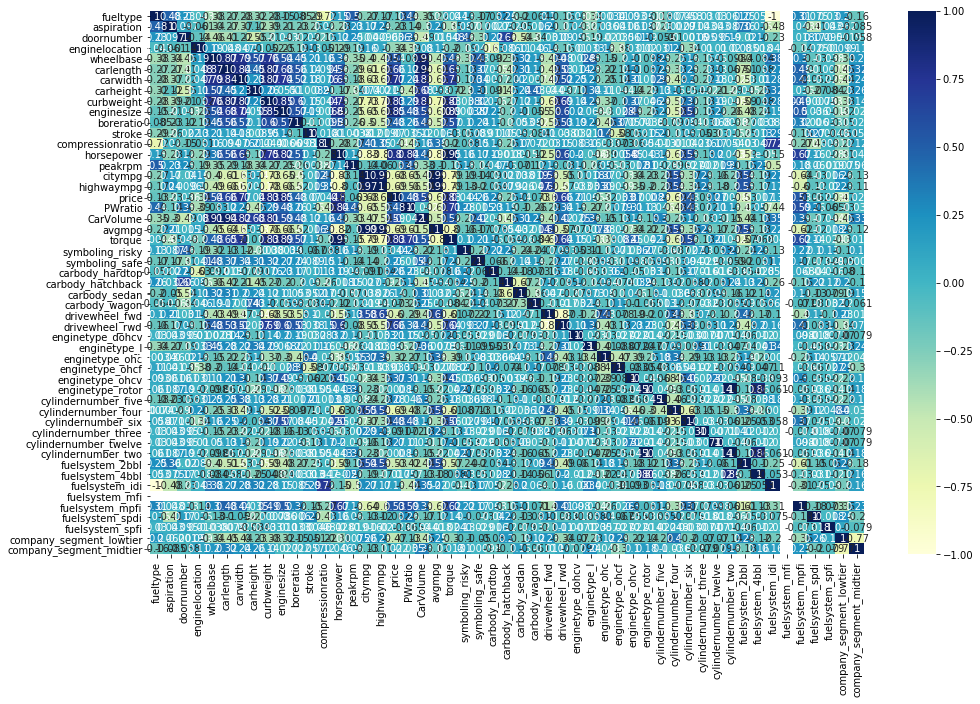

In [61]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

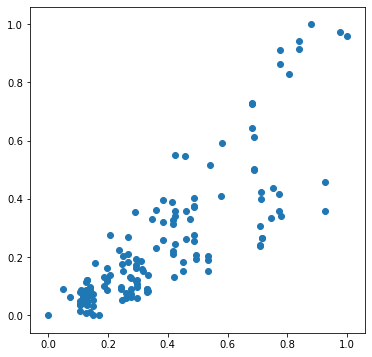

In [62]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.torque, df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [63]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

We will be using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model

### RFE
Recursive feature elimination

In [64]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
#running RFE with th eoutput number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 22),
 ('aspiration', False, 16),
 ('doornumber', False, 31),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', False, 15),
 ('enginesize', False, 14),
 ('boreratio', False, 8),
 ('stroke', False, 2),
 ('compressionratio', False, 13),
 ('horsepower', False, 10),
 ('peakrpm', True, 1),
 ('citympg', False, 32),
 ('highwaympg', False, 34),
 ('PWratio', True, 1),
 ('CarVolume', True, 1),
 ('avgmpg', False, 35),
 ('torque', True, 1),
 ('symboling_risky', False, 33),
 ('symboling_safe', False, 20),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 30),
 ('drivewheel_rwd', False, 19),
 ('enginetype_dohcv', False, 24),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 27),
 ('enginetype_ohcf', False, 28),
 ('enginetype_ohcv', False, 3),
 ('enginetype_rotor', False, 21),
 ('cyl

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'peakrpm',
       'PWratio', 'CarVolume', 'torque', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_l',
       'company_segment_lowtier', 'company_segment_midtier'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'citympg', 'highwaympg', 'avgmpg', 'symboling_risky', 'symboling_safe',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [71]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.24e-70
Time:                        20:25:33   Log-Likelihood:                 211.49
No. Observations:                 141   AIC:                            -391.0
Df Residuals:                     125   BIC:                            -343.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- carlength has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [72]:
X_train1 = X_train_rfe.drop('carlength', axis=1)

In [73]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     151.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.27e-71
Time:                        20:28:20   Log-Likelihood:                 211.21
No. Observations:                 141   AIC:                            -392.4
Df Residuals:                     126   BIC:                            -348.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- wheelbase has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [74]:
X_train2 = X_train1.drop('wheelbase', axis=1)
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.87e-72
Time:                        20:28:24   Log-Likelihood:                 209.99
No. Observations:                 141   AIC:                            -392.0
Df Residuals:                     127   BIC:                            -350.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [75]:
#CarVolume has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
X_train3 = X_train2.drop('CarVolume', axis=1)
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.97e-73
Time:                        20:28:25   Log-Likelihood:                 209.29
No. Observations:                 141   AIC:                            -392.6
Df Residuals:                     128   BIC:                            -354.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [76]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [77]:
getVIF(X_train3)

,Features,VIF
3,PWratio,89.33
4,torque,66.21
0,enginelocation,42.02
1,carwidth,36.31
2,peakrpm,21.66
7,carbody_sedan,16.06
6,carbody_hatchback,12.75
11,company_segment_midtier,6.44
10,company_segment_lowtier,6.40
8,carbody_wagon,5.01


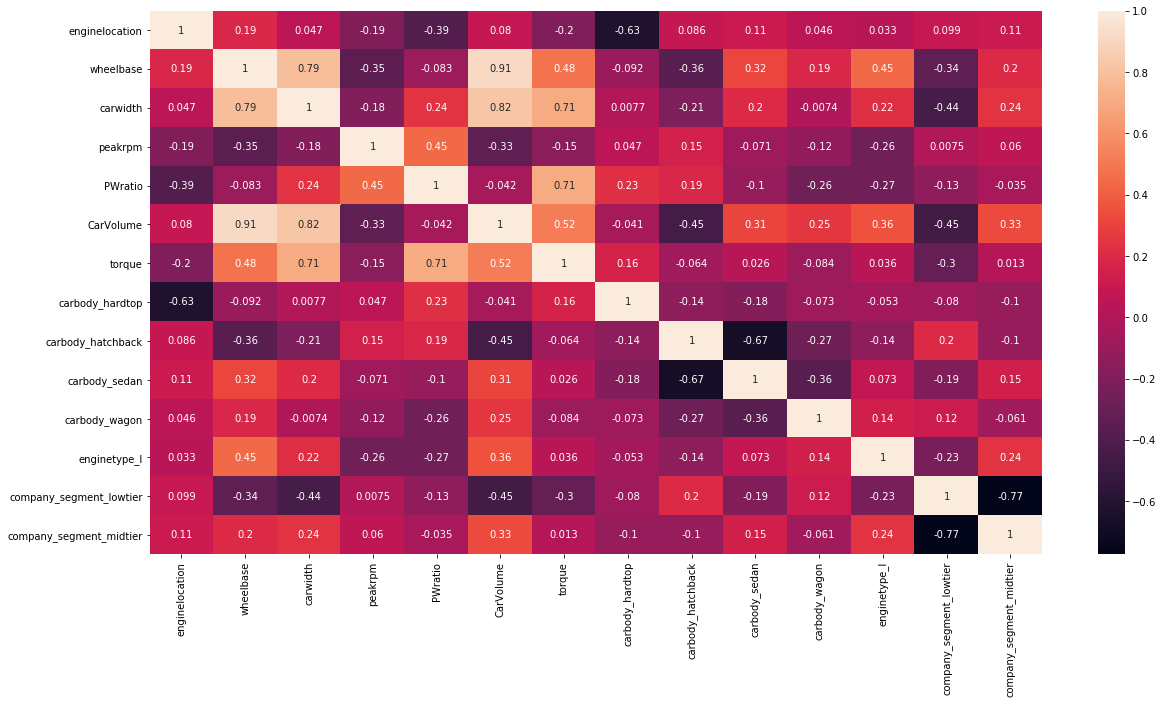

In [78]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train1.corr(),annot = True)

- PWratio is having the highest VIF  Let's remove this

In [79]:
X_train4 = X_train3.drop('PWratio', axis=1)

In [80]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     139.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.51e-66
Time:                        20:28:39   Log-Likelihood:                 188.53
No. Observations:                 141   AIC:                            -353.1
Df Residuals:                     129   BIC:                            -317.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [81]:
getVIF(X_train4)

,Features,VIF
0,enginelocation,42.02
1,carwidth,21.21
6,carbody_sedan,15.09
5,carbody_hatchback,11.49
3,torque,8.58
9,company_segment_lowtier,6.11
10,company_segment_midtier,5.95
2,peakrpm,5.21
7,carbody_wagon,4.99
4,carbody_hardtop,1.60


In [82]:
#enginetype_l has a  p_value> 0.05. Meaning this variable is not having enough impact. Let's drop it.
X_train5 = X_train4.drop('enginetype_l', axis=1)
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.64e-67
Time:                        20:28:47   Log-Likelihood:                 188.02
No. Observations:                 141   AIC:                            -354.0
Df Residuals:                     130   BIC:                            -321.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [83]:
getVIF(X_train5)

,Features,VIF
0,enginelocation,41.88
1,carwidth,20.65
6,carbody_sedan,14.93
5,carbody_hatchback,11.39
3,torque,8.46
8,company_segment_lowtier,6.10
9,company_segment_midtier,5.87
2,peakrpm,4.88
7,carbody_wagon,4.88
4,carbody_hardtop,1.60


In [84]:
#enginelocation has a VIF  > 5. Meaning this variable is not having enough impact. Let's drop it.
X_train6 = X_train5.drop('enginelocation', axis=1)
lm6=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     143.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.79e-63
Time:                        20:28:50   Log-Likelihood:                 176.00
No. Observations:                 141   AIC:                            -332.0
Df Residuals:                     131   BIC:                            -302.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [85]:
#carbody_hardtop has a  p_value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
X_train7 = X_train6.drop('carbody_hardtop', axis=1)
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.15e-64
Time:                        20:28:53   Log-Likelihood:                 175.99
No. Observations:                 141   AIC:                            -334.0
Df Residuals:                     132   BIC:                            -307.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [86]:
getVIF(X_train7)

,Features,VIF
0,carwidth,17.96
2,torque,8.29
4,carbody_sedan,7.12
3,carbody_hatchback,5.54
7,company_segment_midtier,4.73
6,company_segment_lowtier,4.52
1,peakrpm,4.36
5,carbody_wagon,2.82


In [87]:
#carwidth has a VIF  > 5. Meaning this variable is not having enough impact. Let's drop it.
X_train8 = X_train7.drop('carwidth', axis=1)
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.75e-51
Time:                        20:28:58   Log-Likelihood:                 141.49
No. Observations:                 141   AIC:                            -267.0
Df Residuals:                     133   BIC:                            -243.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [88]:
#carbody_wagon has a  p_value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
X_train9 = X_train8.drop('carbody_wagon', axis=1)
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.74e-52
Time:                        20:29:00   Log-Likelihood:                 140.84
No. Observations:                 141   AIC:                            -267.7
Df Residuals:                     134   BIC:                            -247.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [89]:
#carbody_sedan has a  p_value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
X_train10 = X_train9.drop('carbody_sedan', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.79e-53
Time:                        20:29:05   Log-Likelihood:                 140.55
No. Observations:                 141   AIC:                            -269.1
Df Residuals:                     135   BIC:                            -251.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [90]:
getVIF(X_train10)

,Features,VIF
0,const,21.64
4,company_segment_lowtier,3.27
5,company_segment_midtier,2.89
2,torque,1.29
3,carbody_hatchback,1.07
1,peakrpm,1.05


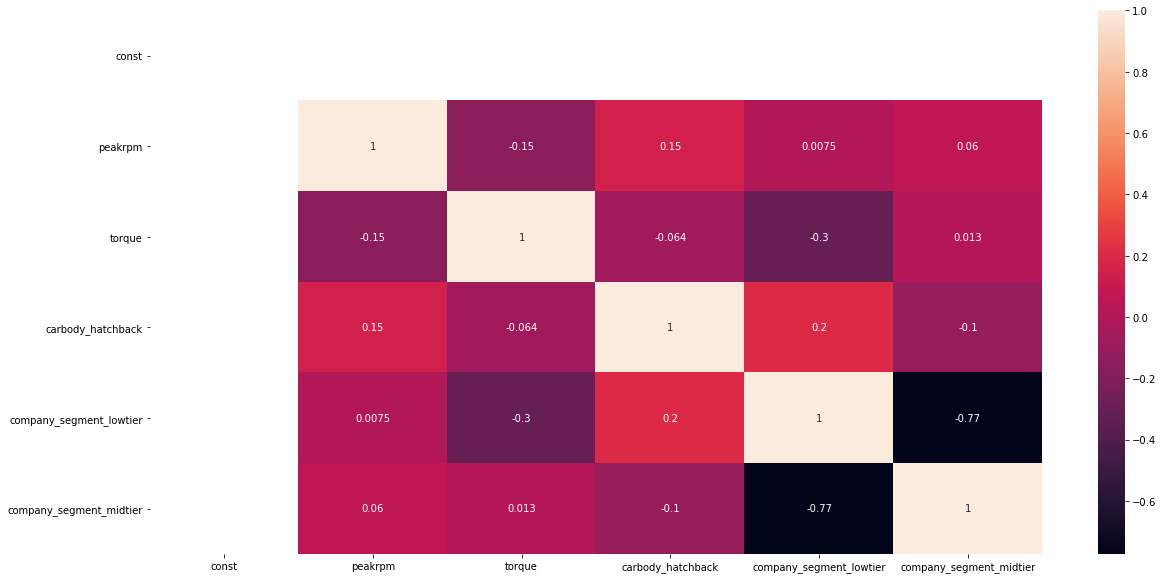

In [91]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train10.corr(),annot = True)

All the independent variable have considerably low VIF and the **Adj. R-Squared is 0.842** which is quite a significant fit. We will conclude with these variables as the final model predictor variables.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [95]:
y_train_price = lm10.predict(X_train10)

In [96]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

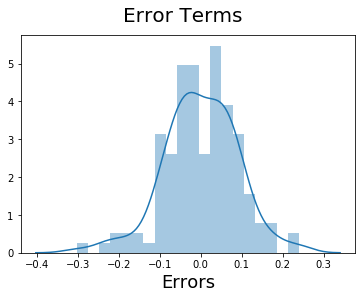

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Although not the perfect normal distribution and centered not perfectly but almost around zero. There is some error variance along the tails meaning model is still not able to explain some variance. considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [98]:
num_vars = ['horsepower','carlength','carwidth','carwidth','wheelbase','curbweight', 'enginesize', 'boreratio','CarVolume','PWratio','torque','stroke','compressionratio','peakrpm','price','avgmpg']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [99]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PWratio,CarVolume,avgmpg,torque,symboling_risky,symboling_safe,carbody_hardtop,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_lowtier,company_segment_midtier
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.0,61.0,61.0,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000
mean,0.934426,0.868852,0.426230,0.983607,0.409893,0.527602,0.458880,53.347541,0.469323,0.423460,0.559251,0.591803,0.504951,0.409469,0.417531,25.819672,31.786885,0.232683,0.442239,0.431803,0.394379,0.381072,0.311475,0.163934,0.032787,...,0.459016,0.114754,0.622951,0.377049,0.0,0.032787,0.819672,0.032787,0.032787,0.0,0.032787,0.852459,0.114754,0.0,0.0,0.0,0.311475,0.0,0.065574,0.016393,0.508197,0.049180,0.0,0.573770,0.327869
std,0.249590,0.340363,0.498632,0.128037,0.201226,0.196615,0.151657,2.336137,0.217401,0.214661,0.190315,0.147778,0.218499,0.266532,0.181184,6.820333,7.204431,0.221210,0.187418,0.208159,0.199340,0.248598,0.466940,0.373288,0.179556,...,0.502453,0.321370,0.488669,0.488669,0.0,0.179556,0.387651,0.179556,0.179556,0.0,0.179556,0.357588,0.321370,0.0,0.0,0.0,0.466940,0.0,0.249590,0.128037,0.504082,0.218039,0.0,0.498632,0.473333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.291667,49.400000,0.103696,0.121622,0.264286,0.057143,0.000000,0.029851,0.020408,15.000000,19.000000,0.008532,0.066439,0.045493,0.057143,0.051457,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.417886,0.341667,51.000000,0.313854,0.250000,0.435714,0.514286,0.406091,0.164179,0.265306,20.000000,26.000000,0.082489,0.309148,0.312339,0.228571,0.187091,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.521951,0.433333,53.000000,0.421698,0.398649,0.521429,0.580952,0.507614,0.365672,0.428571,24.000000,30.000000,0.142340,0.382596,0.385733,0.342857,0.317283,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.544828,0.596748,0.516667,55.200000,0.662734,0.540541,0.742857,0.661905,0.609137,0.507463,0.551020,31.000000,37.000000,0.364492,0.577380,0.553036,0.542857,0.533788,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950000,59.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000,54.000000,1.004660,0.977490,0.992107,1.042857,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000

#### Dividing into X_test and y_test

In [102]:
y_test = df_test.pop('price')
X_test = df_test

KeyError: 'price'

In [103]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [104]:
# Making predictions
y_pred = lm10.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

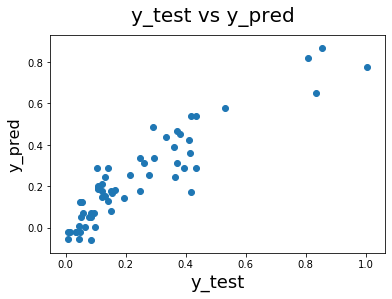

In [105]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.

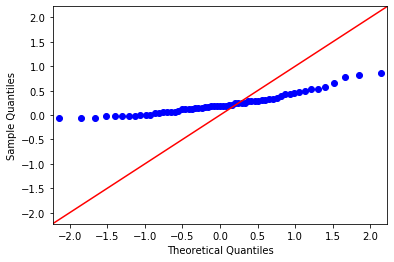

In [106]:
sm.qqplot(y_pred, line='45')
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.09065104178723052
Model r2_score: 0.8292673806514856



We can see that the equation of our best fitted line is:

$ price = 0.2173 + 0.6245  \times  torque + 0.1016  \times  peakrpm - 0.0693 \times carbody_hatchback - 0.2901 \times company_segment_lowtier - 0.2232 \times company_segment_midtier $


This equation implies how the price of the vehical changes with a unit change in any of these independent variable with all other variables held constant.<br>For example we can say, the price of the car changes by 0.1016 for every unit change in the peakrpm if all other variables are held constant. And so is true for all other variables.
<br> The predictor carbody_hatchback suggest that the price of car decreases by a factor of 0.0693 when the car body is hatchback.
<br> the price of the car changes by 0.6245 for every unit change in the torque.
<br> The company name is also essensial in determining the price the automobile. low tier companies decreases price by a factor of 0.2901 nad mid tier by 0.2232.


Final inference from model evaluation

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

Final predictors which can be proposed are

Overall we have a decent model, but we also acknowledge that we could do better. 

| Adj. R-squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- |
| 0.842 | 0.8292 | 2.79e-53 | -269.1 | -251.4 | 0.091

We have a couple of options:
1. Add new features (ground_area= carlength * carwidth, etc.)
2. choosing another set of variables to get a more normal distribution of error terms or use more useful variables like PWratio inplace of horsepower. 
3. Build a non-linear model

**Suggestions:**<br>
The chinese company  Geely Automotives entering the US market should consider the below listed points,

-  **Average US car price:**  13000 USD(approx).
For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.<br>
<br>
Also, keeping into account the predominating or the popular factors of a car in US market will give a better understanding of the needs and requirment of the citizens of USA.
-  **symboling:** moderate (0,1)
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standard
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi

This can be used to make the appropriate changes in design, features and the price offered to the customer.